In [1]:
# Stdlib
import pickle
from IPython.display import display, Latex
from ast import literal_eval as literal

# Scientific computing
import numpy as np

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from tabulate import tabulate

# Preprocessing

## Loading and concatenating dataframes

In [2]:
# Small datasets
metadata = {
    "PROJECT_ID": "EMB_ex29",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.0",
    "DATE": "20230322"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df_small = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

# Large datasets
metadata = {
    "PROJECT_ID": "EMB_ex29",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.1",
    "DATE": "20230322"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df_large = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

df = pd.concat([df_small, df_large])
df = df.reset_index()

In [3]:
df.head()

,index,Unnamed: 0,system,l1,l2,features,theta,intercept,coefficients,accuracy,auroc,aupr,process_time,wall_time
0,0,0,celegans,1,2,{'imb'},0.05,[-1.05860666],[[0.]],0.651746,0.5,0.674127,0.005470,0.005471
1,1,1,celegans,1,2,{'imb'},0.15,[-0.63503955],[[0.]],0.657371,0.5,0.671315,0.004250,0.004250
2,2,2,celegans,1,2,{'imb'},0.25,[-0.74497225],[[0.]],0.649832,0.5,0.675084,0.004128,0.004128
3,3,3,celegans,1,2,{'imb'},0.35,[-0.711632],[[0.]],0.649485,0.5,0.675258,0.037809,0.037810
4,4,4,celegans,1,2,{'imb'},0.45,[-0.68124228],[[0.]],0.651471,0.5,0.674265,0.003869,0.003869


## Pruning

In [4]:
# Drop dummy index
df = df.drop(columns=["Unnamed: 0", "index", "process_time", "wall_time"])

# Drop rows with missing data
df.dropna(how="any", inplace=True)

## Reindexing and renaming

In [5]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [6]:
df.describe()

,alpha,beta,theta,accuracy,auroc,aupr
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,1.250000,3.000000,0.500000,0.821457,0.718024,0.816576
std,0.433788,1.735152,0.287742,0.125842,0.243358,0.217591
min,1.000000,2.000000,0.050000,0.466667,0.030066,0.305313
25%,1.000000,2.000000,0.250000,0.703885,0.522829,0.673424
50%,1.000000,2.000000,0.500000,0.861330,0.699639,0.933053
75%,1.250000,3.000000,0.750000,0.933870,0.953520,0.991576
max,2.000000,6.000000,0.950000,1.000000,1.000000,1.000000


# Analysis

## Performance

### One feature

<Figure size 432x288 with 0 Axes>

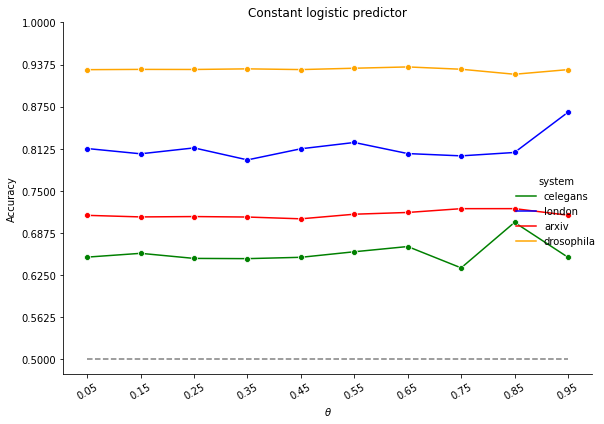

In [19]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'imb'}"], kind="line",
    x="theta", y="accuracy",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("Accuracy")


# Figure-level attributes
plt.title("Constant logistic predictor")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

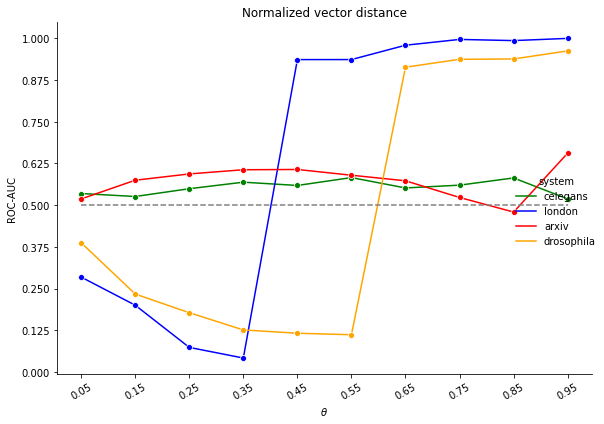

In [8]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'emb'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Normalized vector distance")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

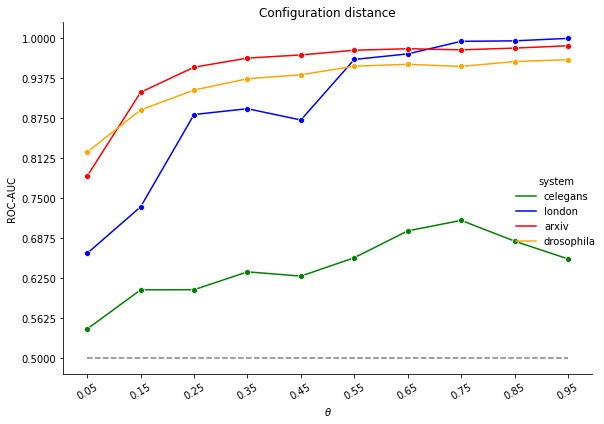

In [9]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'deg'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration distance")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

### Two features

<Figure size 432x288 with 0 Axes>

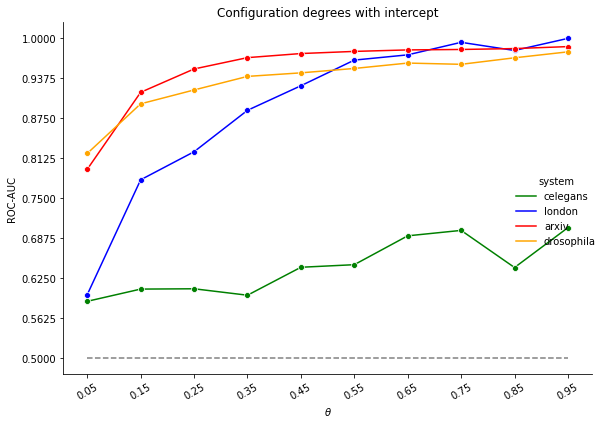

In [10]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'imb', 'deg'}") | (df.features == "{'deg', 'imb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration degrees with intercept")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

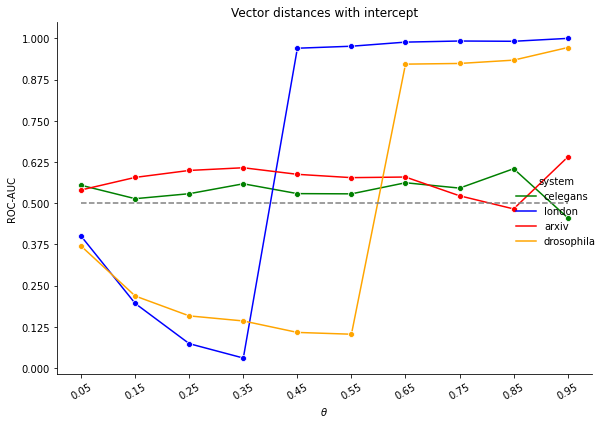

In [11]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'imb'}") | (df.features == "{'imb', 'emb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances with intercept")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

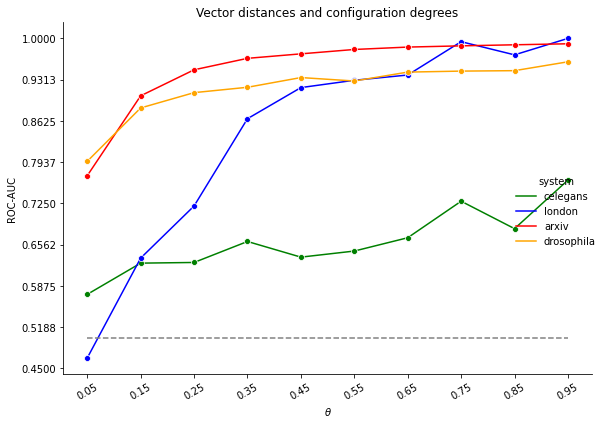

In [12]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'deg'}") | (df.features == "{'deg', 'emb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.45, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances and configuration degrees")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

### All features

<Figure size 432x288 with 0 Axes>

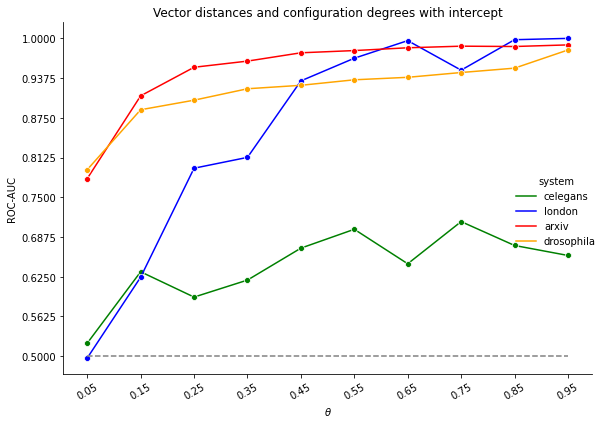

In [13]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'deg', 'imb'}") | (df.features == "{'imb', 'emb', 'deg'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances and configuration degrees with intercept")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

## Coefficient analysis

In [14]:
df["temp_coefs"] = [x.lstrip("[[ ").rstrip("]]").split(" ") for x in df.coefficients]

In [15]:
df["temp_intercepts"] = [literal(x) for x in df.intercept]

In [16]:
[
    float(x)
    for x in df.loc[(df.features == "{'emb', 'deg', 'imb'}") | (df.features == "{'imb', 'emb', 'deg'}")].temp_coefs[135]
    if x != ""
]

[0.21262695, 4.1732494]

TypeError: unhashable type: 'list'

<Figure size 432x288 with 0 Axes>

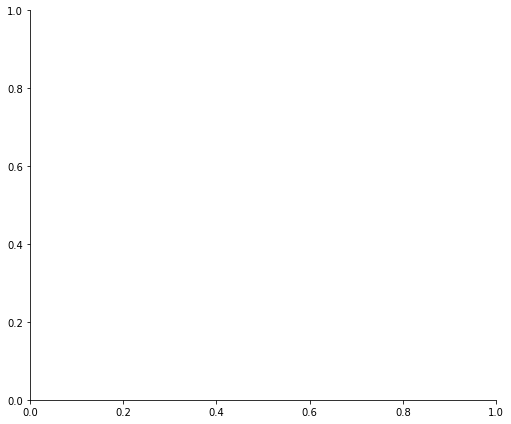

In [17]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'deg', 'imb'}") | (df.features == "{'imb', 'emb', 'deg'}")], kind="line",
    x="theta", y="temp_coefs",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.45, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Coefficients")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)